In [ ]:
#Importamos las librerias y el dataset
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#accedo a los datos
df = pd.read_csv("hepatitis_tag.csv", lineterminator='\n')

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# df.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas.')
df.shape

Este dataset tiene 50002 filas, y 40 columnas.


(50002, 40)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url',
       'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest\r', 'Unnamed: 0.1', 'tweet.1', 'sentiment'],
      dtype='object')

In [ ]:
#df.drop(['Unnamed: 0','tweet.1'], axis=1, inplace=True)

In [ ]:
#df.columns

In [ ]:
df.shape

(50002, 40)

In [ ]:
df2 = pd.DataFrame()
df2 = df[['sentiment','replies_count','retweets_count', 'likes_count']]

In [ ]:
df2.shape

(50002, 4)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sentiment       50002 non-null  float64
 1   replies_count   50002 non-null  int64  
 2   retweets_count  50002 non-null  int64  
 3   likes_count     50002 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sentiment       50002 non-null  float64
 1   replies_count   50002 non-null  int64  
 2   retweets_count  50002 non-null  int64  
 3   likes_count     50002 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [ ]:
df2.head(20)

,sentiment,replies_count,retweets_count,likes_count
0,0.0,0,0,0
1,0.0,0,0,0
2,2.0,0,0,0
3,0.0,0,0,0
4,0.0,0,0,0
5,0.0,0,0,0
6,0.0,1,0,0
7,0.0,1,0,0
8,0.0,0,0,0
9,2.0,0,1,1


                sentiment  replies_count  retweets_count  likes_count
sentiment        1.000000       0.027949        0.001232     0.005944
replies_count    0.027949       1.000000        0.588400     0.613709
retweets_count   0.001232       0.588400        1.000000     0.970830
likes_count      0.005944       0.613709        0.970830     1.000000


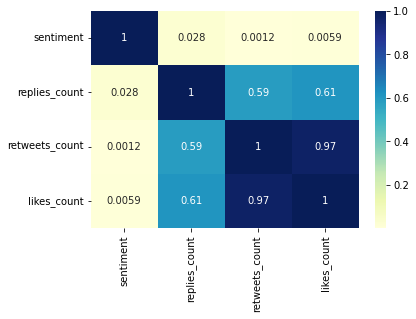

In [ ]:
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

In [ ]:
X = df2.drop("sentiment", axis=1) #Elimino de mi dataset la variable a predecir
y = df2.sentiment #Defino el Target

In [ ]:
X

,replies_count,retweets_count,likes_count
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
49997,0,2,5
49998,0,0,0
49999,1,0,1
50000,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
# (with_mean=False, with_std=False)
X = ss.fit_transform(X)
X

array([[-0.08864567, -0.02976966, -0.03250667],
       [-0.08864567, -0.02976966, -0.03250667],
       [-0.08864567, -0.02976966, -0.03250667],
       ...,
       [ 0.00051892, -0.02976966, -0.03083781],
       [-0.08864567, -0.02976966, -0.03250667],
       [-0.08864567, -0.02976966, -0.02916895]])

In [ ]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

## ARBOL DE DECISIÓN 

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creamos el modelo

In [ ]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 71.10%
% de aciertos sobre el set de evaluación: 69.80%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_true=y_test,y_pred=tree.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82     10471
         1.0       0.00      0.00      0.00      3155
         2.0       0.00      0.00      0.00      1375

    accuracy                           0.70     15001
   macro avg       0.23      0.33      0.27     15001
weighted avg       0.49      0.70      0.57     15001

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [ ]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(15,15))
# importances = tree.feature_importances_
# columns = X.columns
# sns.barplot(columns, importances)
# plt.title('Importancia de cada Feature')
# plt.show()

In [ ]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

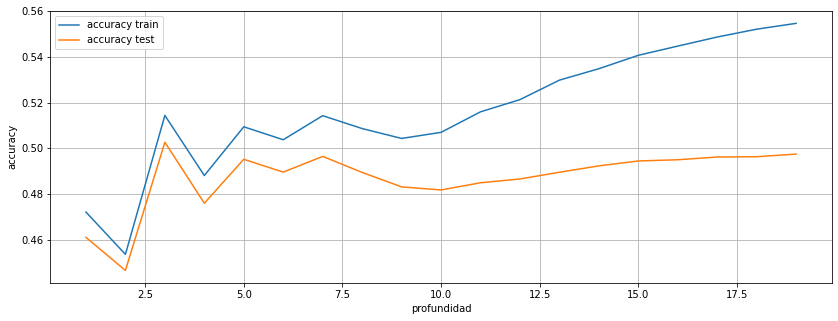

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
plt.grid()
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

In [ ]:
# veamos que pasa con un árbol sin corte de profundidad
np.random.seed(2021)
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
arbol.fit(X_train, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Exactitud en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_train))*100)
print('Exactitud en test: %f' % accuracy_score(y_test,arbol.predict(X_test))*100)

Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 0.739407Exactitud en entrenamiento: 

### KNN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1000, weights='distance')

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1000, weights='distance')

In [ ]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7371789377446358
% de aciertos sobre el set de evaluación: 0.7224185054329711


In [ ]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
valores_k = list(range(1,50,4))
resultados_train_u = []
resultados_test_u  = []
resultados_train_w = []
resultados_test_w  = []

for k in valores_k:
    # instanciamos el modelo uniforme
    clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf_u.fit(X_train, y_train)
    y_train_pred = clf_u.predict(X_train)
    y_pred = clf_u.predict(X_test)
    resultados_train_u.append(accuracy_score(y_train, y_train_pred))
    resultados_test_u.append(accuracy_score(y_test, y_pred))

    clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf_w.fit(X_train, y_train)
    y_train_pred = clf_w.predict(X_train)
    y_pred = clf_w.predict(X_test)
    resultados_train_w.append(accuracy_score(y_train, y_train_pred))
    resultados_test_w.append(accuracy_score(y_test, y_pred))

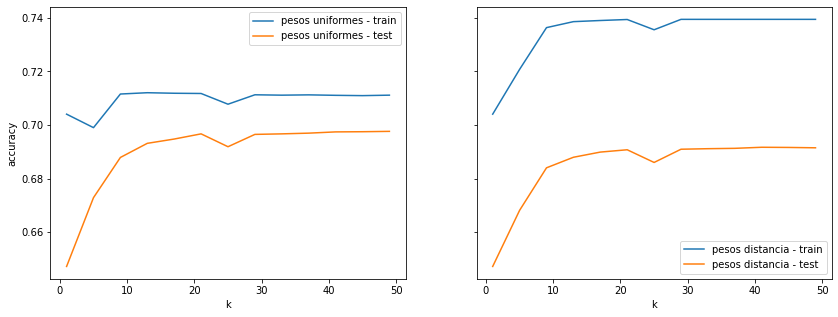

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
ax[0].set(xlabel='k',ylabel='accuracy');

ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
ax[1].set(xlabel='k');

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [ ]:
# ahora busquemos nuestro mejor modelo usando validacion cruzada y gridsearchcv pero incluyamos otra distancia!
model = KNeighborsClassifier()
n_neighbors = np.array([1,2,3,5,8,10,15,20,30,50])
param_grid = {'n_neighbors': n_neighbors, 
              'weights':['uniform', 'distance'], 
              'metric':['euclidean', 'chebyshev', 'manhattan']}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_).sample(3)

{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.035157,0.011507,1.188182,0.028979,chebyshev,3,distance,"{'metric': 'chebyshev', 'n_neighbors': 3, 'wei...",0.631767,0.645429,0.664000,0.693857,0.659286,0.658868,0.020813,52
52,0.028448,0.003568,1.698178,0.054968,manhattan,15,uniform,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.703899,0.709429,0.702143,0.706000,0.708714,0.706037,0.002771,10
58,0.032037,0.009968,1.710067,0.035818,manhattan,50,uniform,"{'metric': 'manhattan', 'n_neighbors': 50, 'we...",0.710327,0.710714,0.710857,0.710714,0.710571,0.710637,0.000179,1


### RANDOM FOREST

In [ ]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [ ]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy*100)
print('% de aciertos sobre el set de evaluación:',test_accuracy*100)

% de aciertos sobre el set de entrenamiento: 0.5650981400531413
% de aciertos sobre el set de evaluación: 0.5075661622558496


## REGRESION LOGISTICA

In [ ]:
#Entrenamos un modelo de regresión logística

# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

In [ ]:
y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy*100)
print('% de aciertos sobre el set de evaluación:',test_accuracy*100)

% de aciertos sobre el set de entrenamiento: 0.7108939744578726
% de aciertos sobre el set de evaluación: 0.6978201453236451


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1678f438-dd57-41c5-b88b-bfcde7b7ccb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>